In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
import time
import os

# proxyの設定．
# keras.datasetsでは，datasetを直接ダウンロードするので，学内マシンからは通常必要．
os.environ["http_proxy"] = "http://proxy.uec.ac.jp:8080/"
os.environ["https_proxy"] = "http://proxy.uec.ac.jp:8080/"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"      # "0":GPU0, "1":GPU1, "0,1":GPUを2つとも使用

import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
SYNSET_FILE='synset_words.txt'  # ImageNet1000 種類のカテゴリ名が書かれたファイル．
synset=open(SYNSET_FILE).read().split('\n')

In [312]:
img2 = Image.open('red.jpg')
img = Image.open('bird.jpg')
img = img.resize((256,256))
img2 = img2.resize((64,64))

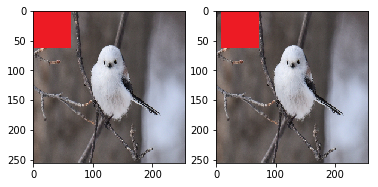

In [272]:
tempimg = img.copy()
tempimg.paste(img2,(0,0))
plt.subplot(1,2,1)
plt.imshow(tempimg)
plt.subplot(1,2,2)
tempimg = img.copy()
tempimg.paste(img2,(8,0))
plt.imshow(tempimg)

In [ ]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
image_transform = transforms.Compose([transforms.ToTensor(),normalize])

In [273]:
vgg16 = models.vgg16(pretrained=True,progress=True)
softmax=nn.Softmax(dim=1)

In [300]:
h = np.zeros((39, 39))
for y in range(0,39):
    for x in range(0,39):
        tempimg = img.copy()
        tempimg.paste(img2,(-56+x*8,-56+y*8))
        tempimg = image_transform(tempimg)
        tempimg = tempimg.unsqueeze(0)
        vgg16.eval() 

        with torch.no_grad():
            out=softmax(vgg16(tempimg)).numpy()[0]  
        img = Image.open('bird.jpg').resize((256,256))
        h[y][x] = out[synset.index("n01592084 chickadee")]

0.35430893 0.39967384934425354
0.35367388 0.3837619423866272
0.35847044 0.38187241554260254
0.36631346 0.3809271454811096
0.36847767 0.38377103209495544
0.3673286 0.37945064902305603
0.3729244 0.37987834215164185
0.37600508 0.37525707483291626
0.34458196 0.37189194560050964
0.34905937 0.3640528619289398
0.36984104 0.3659934103488922
0.36990604 0.36699748039245605
0.36836627 0.37705346941947937
0.36552656 0.37190741300582886
0.37824598 0.3678619861602783
0.38009536 0.35339298844337463
0.37891498 0.36053717136383057
0.41377562 0.3517315685749054
0.38375413 0.3562512695789337
0.3703178 0.3408111333847046
0.36456892 0.35739246010780334
0.34871313 0.3454195559024811
0.33619738 0.3494219481945038
0.33221567 0.3368450999259949
0.32908422 0.3452983498573303
0.3315257 0.3366929888725281
0.33895048 0.34394386410713196
0.36188003 0.3308238387107849
0.36412257 0.34633365273475647
0.360457 0.3481839895248413
0.35421732 0.3587043583393097
0.35323232 0.3392016589641571
0.36232594 0.34575918316841125


0.42940703 0.38544055819511414
0.42123213 0.39908090233802795
0.40139884 0.4107823967933655
0.4192906 0.4216228425502777
0.42090723 0.4221533238887787
0.42144006 0.4217211604118347
0.4078881 0.4207131266593933
0.46719798 0.424709677696228
0.35670468 0.41543853282928467
0.32225004 0.41095292568206787
0.30724353 0.4055444896221161
0.3277804 0.4084482491016388
0.31683096 0.4212265908718109
0.32766438 0.4193955361843109
0.37672204 0.41345563530921936
0.47115827 0.4059371054172516
0.4190027 0.4099843502044678
0.29553232 0.4106389880180359
0.3261062 0.3956865668296814
0.3722446 0.397403746843338
0.42595327 0.39433395862579346
0.45650762 0.3938390910625458
0.41334504 0.38707664608955383
0.4148477 0.3875037133693695
0.31212026 0.3907257318496704
0.3539204 0.3944569230079651
0.36711636 0.38755422830581665
0.3792298 0.37861984968185425
0.38059545 0.3814891576766968
0.38538232 0.3863564729690552
0.3751616 0.3911912143230438
0.40462694 0.3694216012954712
0.42491782 0.36823201179504395
0.39465788 0

0.3273412 0.31312790513038635
0.44700697 0.3885820806026459
0.4190031 0.40307703614234924
0.43624553 0.42097076773643494
0.45881063 0.43925318121910095
0.43289617 0.4350084960460663
0.4664643 0.44532614946365356
0.4846328 0.44733956456184387
0.4523487 0.4523674547672272
0.43646553 0.44682982563972473
0.38320652 0.4488809406757355
0.51169366 0.4518412947654724
0.53584623 0.4533710777759552
0.65277046 0.4597780406475067
0.786826 0.4610935151576996
0.6774547 0.4649676978588104
0.44893038 0.46236470341682434
0.2101743 0.4647478759288788
0.14403704 0.4688186049461365
0.11499163 0.4585690498352051
0.14043388 0.4548241198062897
0.16136804 0.45033949613571167
0.14012058 0.4277813732624054
0.17544167 0.40898415446281433
0.12926981 0.4091280698776245
0.13430509 0.39289212226867676
0.15458417 0.40646013617515564
0.34951338 0.3939487934112549
0.30020955 0.4044305682182312
0.3446506 0.403314471244812
0.3642378 0.4059927761554718
0.34386176 0.39438241720199585
0.3494053 0.38132908940315247
0.3761185

0.36458904 0.2909739017486572
0.33923563 0.2618214786052704
0.42678314 0.3645080029964447
0.40926608 0.429318368434906
0.39975607 0.4404640197753906
0.42599255 0.4549078941345215
0.41548648 0.44486185908317566
0.41232356 0.43527764081954956
0.42643055 0.44006019830703735
0.45365685 0.4364281892776489
0.38836944 0.4406145215034485
0.29468653 0.4445020854473114
0.32625237 0.44985702633857727
0.4270515 0.43455252051353455
0.61765605 0.4266412854194641
0.62151766 0.415927529335022
0.5457528 0.40745022892951965
0.46264464 0.4071912467479706
0.5354882 0.41417333483695984
0.52398473 0.39703136682510376
0.4311407 0.3502548038959503
0.30544335 0.3511890470981598
0.30550665 0.3383331596851349
0.2192157 0.32291361689567566
0.19508177 0.31708815693855286
0.093898386 0.3346961438655853
0.0929917 0.32342180609703064
0.11857383 0.33986568450927734
0.099426284 0.3503600060939789
0.13234314 0.35277363657951355
0.15750441 0.3676382005214691
0.17498866 0.359281986951828
0.25399703 0.3548027575016022
0.30

0.36596438 0.2945097088813782
0.34650955 0.29946368932724
0.3902555 0.31171488761901855
0.36969453 0.4161287248134613
0.38681886 0.4375283718109131
0.38555643 0.4470978081226349
0.3779903 0.412494957447052
0.35117862 0.39780741930007935
0.35505038 0.37950676679611206
0.3587969 0.42045503854751587
0.35325494 0.41464489698410034
0.32455838 0.4266912341117859
0.3526854 0.4394949674606323
0.38603076 0.45511218905448914
0.3635188 0.46098050475120544
0.3470167 0.44266238808631897
0.2771717 0.41989511251449585
0.23840621 0.3970259130001068
0.24154493 0.3875831067562103
0.19824594 0.3590491712093353
0.1533884 0.32735857367515564
0.14741904 0.3169332444667816
0.13053337 0.2995626926422119
0.12433387 0.2743358612060547
0.09317863 0.2838633954524994
0.07645151 0.2863714396953583
0.06809804 0.29835939407348633
0.10257288 0.307977557182312
0.15743378 0.357464462518692
0.2278357 0.3468261957168579
0.25813293 0.4018874764442444
0.24947329 0.4249008297920227
0.2884236 0.4373910427093506
0.33375058 0.4

0.3644748 0.4478735625743866
0.3714008 0.3962811231613159
0.37024486 0.4335787296295166
0.3739594 0.4406735599040985
0.36215758 0.44008979201316833
0.36018682 0.4477218985557556
0.35754216 0.4473434090614319
0.35664642 0.4452272653579712
0.35883352 0.4473797380924225
0.3489644 0.4498906433582306
0.34307924 0.4154750406742096
0.38336882 0.4257160425186157
0.32361987 0.38581034541130066
0.35087484 0.3940058648586273
0.35493726 0.36474162340164185
0.35635805 0.3785644471645355
0.3573743 0.40108180046081543
0.34683517 0.4085216522216797
0.33794406 0.4118528366088867
0.3320268 0.4082549512386322
0.3401627 0.4191206395626068
0.33784235 0.39873114228248596
0.30523336 0.4042377769947052
0.29486093 0.39160677790641785
0.31907913 0.4188852310180664
0.33242103 0.44145190715789795
0.3319482 0.44922319054603577
0.3235659 0.4685954451560974
0.3412935 0.48185494542121887
0.347989 0.4759990870952606
0.3338548 0.4865984618663788
0.40176347 0.4867301881313324
0.36706096 0.5016912817955017
0.36526582 0.5

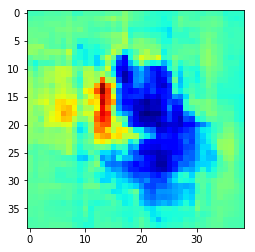

In [302]:
plt.imshow(h,cmap='jet')

# 考察のための実験

0.35430893301963806


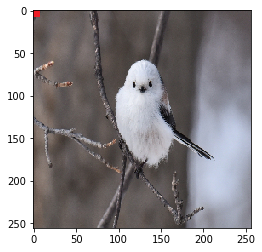

In [307]:
x = 0
y = 0
tempimg = img.copy()
tempimg.paste(img2,(-56+x*8,-56+y*8))
print(h[y][x])
plt.imshow(tempimg)

In [310]:
tempimg = image_transform(tempimg)
tempimg = tempimg.unsqueeze(0)
vgg16.eval() 
with torch.no_grad():
    out=softmax(vgg16(tempimg)).numpy()[0]  

In [311]:
top5   =np.sort(out)[:-6:-1]   
top5idx=np.argsort(out)[:-6:-1] 
for i in range(5):
    print("[%d] %.8f %s" % (i+1,top5[i],synset[top5idx[i]]))

[1] 0.38838887 n01534433 junco, snowbird
[2] 0.35430893 n01592084 chickadee
[3] 0.05238907 n01531178 goldfinch, Carduelis carduelis
[4] 0.04520550 n01796340 ptarmigan
[5] 0.03354051 n01601694 water ouzel, dipper


# 考察
ヒートマップを見てみると鳥の位置と実際の位置が一致していることが分かる。
鳥左側のみが赤くなっていて確率が大きくなっていることが分かる。これは上記の実行結果を見てわかるように[1] 0.38838887 n01534433 junco, snowbirdが一番確率が高くこの鳥のカテゴリであるchickadeeが2番目にあり、似ているカテゴリが存在した。そのために、鳥の左側をoccluderで覆ったときにjunco, snowbirdの特徴が消されてchickadeeの確率が上がったためであると考えられる。